## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [145]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Olsson'  # string
student['Firstname']='Gottfrid' # string
student['CID']='gotols'        # string
student['DOB-year']=2000         # four-digit integer
student['DOB-month']=5          # integer in the range [1, 12]
student['DOB-day']=4             # integer in the range [1, 31]

In [146]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [147]:
student_self_assessment = True

In [148]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 2
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 12-Sep-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [150]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Coin tossing
### (2 points)

Read the data with simulated coin tosses from the file `cointosses.dat`.
Each row corresponds to a single toss: 0=tails; 1=heads

Extract the mean and the 95% credible intervals (Degree-of-belief or DoB intervals) from the first 8 tosses, the first 64 tosses, the first 512 tosses and all 4096 tosses in the data assuming a uniform prior for the probability $p_H$ of obtaining a head in a single toss.

*Hint*: Sample code for computing the DoB interval is available in the demonstration notebook `demo-BayesianBasics.ipynb`.

In [151]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize

In [152]:
# Read data
data = np.loadtxt(f'{DATA_DIR}/cointosses.dat')

In [153]:
# Optional. 
# Insert utility code / functions here.

def get_heads_count(cointoss_data):
    return sum(cointoss_data)


def get_tails_count(cointoss_data):
    N = len(cointoss_data)
    H = get_heads_count(cointoss_data)
    
    return N - H 


def mode_of_beta_distribution(a, b):
    """
    Finds the mode of a beta distribution with parameters a and b, see documentation:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
    """
    
    assert a > 1 and b >= 1, f'Parameters a={a} and b={b} must both be greater than 1 to use this expression for the mode.'
     # this only breaks if you analyze data with heads=0 and tails=0. If this is the case - choose more of your data
    
    # source for mode: https://en.wikipedia.org/wiki/Beta_distribution [2022-09-15]
    if a > 1 and b > 1:
        mode = np.array( (a-1)/(a+b-2) ) 
    
    if a > 1 and b == 1:
        mode = np.array(1, dtype=np.float64) #typecasting to np.float64 for assertion below

    return mode
    

def statistical_measures(distribution, a, b):
    """
    Finds the mean, median, mode, and 68%/95% credible intervals for the given 
    1D distribution (an object from scipy.stats). 
    beta distribution with parameters a and b
    """
    
    mean   = distribution.mean()
    median = distribution.median()
    
    mode = mode_of_beta_distribution(a,b)
    
    cred68 = distribution.interval(0.68)
    cred95 = distribution.interval(0.95)
    
    return mean, median, mode, cred68, cred95



def print_statistical_measures(data, distribution, a, b):
    """
        Prints: mean, meadian, mode, and 68 and 95 CIs for a distribution with datapints = data
    """
    
    H = get_heads_count(data)
    T = get_tails_count(data)
    
    mean, median, mode, cred68, cred95 = statistical_measures(distribution, a, b)

    print(f"{len(data)} coin-tosses (heads: {H:.0f}, tails: {T:.0f}):")
    print(f'             Mean: {mean:.4f}')
    print(f'             Mode: {mode:.4f}')
    print(f'           Median: {median:.4f}')
    print(f'  Credible region: [{cred68[0]:.3f},{cred68[1]:.3f}] (68%)')
    print(f'  Credible region: [{cred95[0]:.3f},{cred95[1]:.3f}] (95%)')
    print('\n')
    
    return

In [154]:
# Define a function that returns the mean, median, and 68%/95% credible intervals 
# of the Bayesian posterior with an input data array of coin flips 
# and using a uniform [0,1] prior for the pH probability of getting a head result.


def bayesian_analysis_coin_flips(data_coin_tosses):
    """
    Returns various Bayesian analysis results for the given data of coin tosses.
    
    The posterior is p( pH | data, I).
    Assume a uniform p(pH|I) = U[0,1] prior
    
    Args:
        data_coin_tosses: Array of shape (m,) with 'm' independent binary data.
            0 = tails; 1 = heads
            
    Returns:
        (mean, mode, median, dob68, dob95): A tuple with the following elements
            mean: The mean of the posterior distribution (float)
            mode: The mode of the posterior distribution (float)
            median: The median of the posterior distribution (float)
            dob68: A tuple (lo,hi) with the lower and upper limits of the 
                68% degree-of-belief range of the posterior distribution (float,float)
            dob95: A tuple (lo,hi) with the lower and upper limits of the 
                95% degree-of-belief range of the posterior distribution (float,float)
    """
    data = data_coin_tosses
    H, T = get_heads_count(data), get_tails_count(data)
    a, b = H+1, T+1
        
    ###
    # Posterior is in this case the beta-function in scipy.stats, with a=H+1 and b=T+1,
    # where H is number of heads and T is number of tails.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
    ###
    posterior = stats.beta(a, b)

    print_statistical_measures(data, posterior, a, b)
        
    mean, median, mode, cred68, cred95 = statistical_measures(posterior, a, b)

    return mean, mode, median, cred68, cred95



num_flips = [8, 64, 512, 4096]
for flips in num_flips:
    data_coin_tosses = data[0:flips]
    bayesian_analysis_coin_flips(data_coin_tosses)

8 coin-tosses (heads: 3, tails: 5):
             Mean: 0.4000
             Mode: 0.3750
           Median: 0.3931
  Credible region: [0.247,0.554] (68%)
  Credible region: [0.137,0.701] (95%)


64 coin-tosses (heads: 31, tails: 33):
             Mean: 0.4848
             Mode: 0.4844
           Median: 0.4847
  Credible region: [0.424,0.546] (68%)
  Credible region: [0.366,0.605] (95%)


512 coin-tosses (heads: 249, tails: 263):
             Mean: 0.4864
             Mode: 0.4863
           Median: 0.4864
  Credible region: [0.464,0.508] (68%)
  Credible region: [0.443,0.530] (95%)


4096 coin-tosses (heads: 1999, tails: 2097):
             Mean: 0.4880
             Mode: 0.4880
           Median: 0.4880
  Credible region: [0.480,0.496] (68%)
  Credible region: [0.473,0.503] (95%)




In [155]:
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:1])
for output in (mean, mode, median, dob68[0], dob95[0]):
    assert output.dtype=='float64', 'Wrong type'
assert len(dob68)==2, 'DoB tuple should be of length 2'
assert len(dob95)==2, 'DoB tuple should be of length 2'
assert np.abs(mean-0.667)<0.001
assert np.abs(mode-1.0)<0.001
assert np.abs(median-0.707)<0.001


1 coin-tosses (heads: 1, tails: 0):
             Mean: 0.6667
             Mode: 1.0000
           Median: 0.7071
  Credible region: [0.400,0.917] (68%)
  Credible region: [0.158,0.987] (95%)




## Problem 2: Straight line fitting
### (2 points)

We will be fitting a straight line to a set data. Our model has two parameters $\theta=[b,m]$ (pay attention to the indexing $\theta[0]=b; \theta[1]=m$)

$$
y_M(x) = mx + b
$$

And our statistical model assumes that errors are normally distributed

$$
y_i = y_M(x_i;\theta) + \varepsilon_i,
$$

where $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ and we assume a fixed standard deviation $\sigma = 50$. 

(Note that the $\varepsilon_i \sim \ldots$ notation means that $\varepsilon_i$ is a random variable that follows the specified distribution.)

Read the data from the file `straightline.dat`.

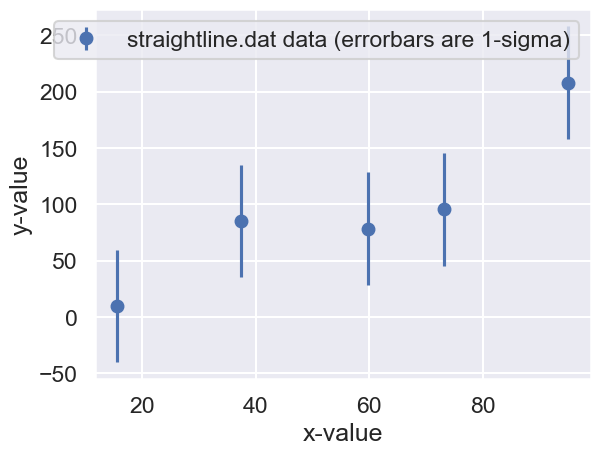

In [156]:
# Load the data and plot with fixed error bar 
# Use np.loadtxt() for loading data (the argument 'unpack=True' is useful)
# and plt.errorbar() for plotting data with errorbars

data_2 = np.loadtxt(f'{DATA_DIR}/straightline.dat', unpack=True)
x,y = data_2
sigma = 50
y_err, x_err = sigma, None #take errorbar as the standard deviation of errors / 2, none for x (no information about that)
plt.errorbar(x, y, y_err, x_err, 'o', label='straightline.dat data (errorbars are 1-sigma)')
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.legend()
plt.show()

We use a flat prior for the intercept:
- $-1000 < b < 1000$

For the slope parameter we try with two different priors : 
1. a flat prior, $-1000 < m < 1000$
1. a symmetric / scale-invariant one.

In both cases we return the log of the pdf.

In [157]:
def log_flat_prior(theta):
    if np.all(np.abs(theta) < 1000):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)
    
def log_symmetric_prior(theta):
    if np.abs(theta[0]) < 1000:
        return -1.5 * np.log(1 + theta[1] ** 2)
    else:
        return -np.inf  # log(0)

These are some questions that will be addressed in this problem:
* Where is the mode of the posterior with these two different priors?
* Plot the joint pdf for the slope and the intercept for the two different prior choices.
* Are the two parameters correlated or anticorrelated?

In [158]:
def y_th(x, theta):
    return theta[1]*x + theta[0] # theta[1]=slope=m (x^1-term), theta[0]=intercept=b (x^0-term)


def log_likelihood(theta, x, y, dy=50):
    '''
    Returns the log likelihood.
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
            x: data (independent variable). array of floats
            y: data (dependent variable). array of floats
           dy: fixed error (optional; default=50), standard deviation of a normal distribution
        
    Returns:
         logL: log likelihood. array of floats
    '''
    assert len(x) == len(y), f'Data x and y must be of equal length, they are len(x)={len(x)} and len(y)={len(y)}'
    
    sigma = dy #assumed equal for all datapoints
    logL = 0
    
    for i in range(len(x)):
        logL += -(1/2) * (y[i] - y_th(x[i], theta))**2 / sigma**2 #log of likelihood is sum of chi^2-terms 
    
    return logL

In [159]:
# We'll start by defining a function which takes a two-dimensional grid of likelihoods and 
# returns 1, 2, and 3-sigma contours. This acts by sorting and normalizing the values and then 
# finding the locations of the  0.682 ,  0.952 , and  0.9972  cutoffs:
def contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior"""
    _sorted = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(_sorted) / np.sum(_sorted)
    cutoffs = np.searchsorted(pct, np.array([0.682, 0.952, 0.9972]) ** 2)
    return np.sort(_sorted[cutoffs])

# Optional. 
# Insert utility code / functions here.


#for scipy.optimize.minimize //2022-09-16
#minimize the negative posterior <==> maximize positive posterior
def neg_posterior_uniform_prior(theta):
    return -( log_likelihood(theta, x, y, dy=50) + log_flat_prior(theta) )

def neg_posterior_symmetric_prior(theta):
    return -( log_likelihood(theta, x, y, dy=50) + log_symmetric_prior(theta) )


In [160]:
# The dictionary MAP (= maximum a posteriori) should return the mode 
# of the posterior distribution.
# The key is the prior and the value is resulting posterior mode (peak)
# given as theta* = [b*, m*] where y = m*x+b
MAP = {}
MAP['uniform_prior']   = [0.0, 0.0]
MAP['symmetric_prior'] = [0.0, 0.0]


#Use scipy.optimize to solve for theta*
theta_0 = [0.0, 0.0]
bounds  = ((-1000,1000),(-1000,1000))

opt_uniform   = optimize.minimize(neg_posterior_uniform_prior,   theta_0, method='SLSQP', bounds=bounds)
opt_symmetric = optimize.minimize(neg_posterior_symmetric_prior, theta_0, method='SLSQP', bounds=bounds)

theta_uniform_star   = np.array(opt_uniform.x)
theta_symmetric_star = np.array(opt_symmetric.x)


MAP['uniform_prior']   = [theta_uniform_star[0],   theta_uniform_star[1]] 
MAP['symmetric_prior'] = [theta_symmetric_star[0], theta_symmetric_star[1]]

#print('MAP:s')
#print(MAP)

In [161]:
for prior in ['uniform_prior','symmetric_prior']:
    assert len(MAP[prior])==2, f'{prior}: The length of the MAP mode should be 2.'
    assert MAP[prior][0] != 0.0, f'{prior}: The intercept should not be 0.0.'
    assert MAP[prior][1] != 0.0, f'{prior}: The slope should not be 0.0.'
    

- Plot the joint posterior for the two model parameters for the two different priors.
- Indicate whether the slope and the intercept are correlated or anti-correlated.

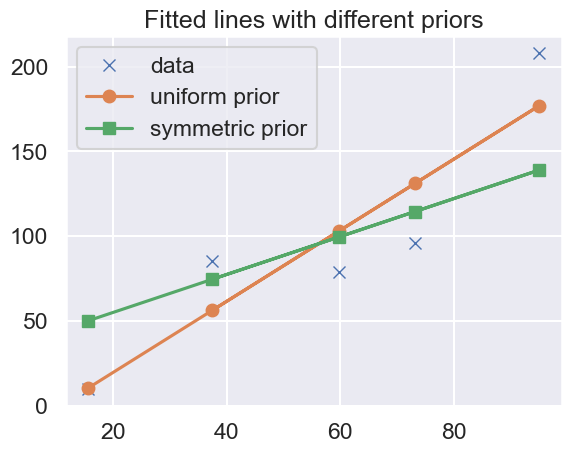

In [162]:
# Look at the fitted lines for the MAP
y_uniform   = y_th(x, theta_uniform_star)
y_symmetric = y_th(x, theta_symmetric_star)

plt.plot(x, y, 'x', markersize='8', label='data')
plt.plot(x, y_uniform, 'o-', label='uniform prior')
plt.plot(x, y_symmetric, 's-', label='symmetric prior')
plt.title('Fitted lines with different priors')
plt.legend();


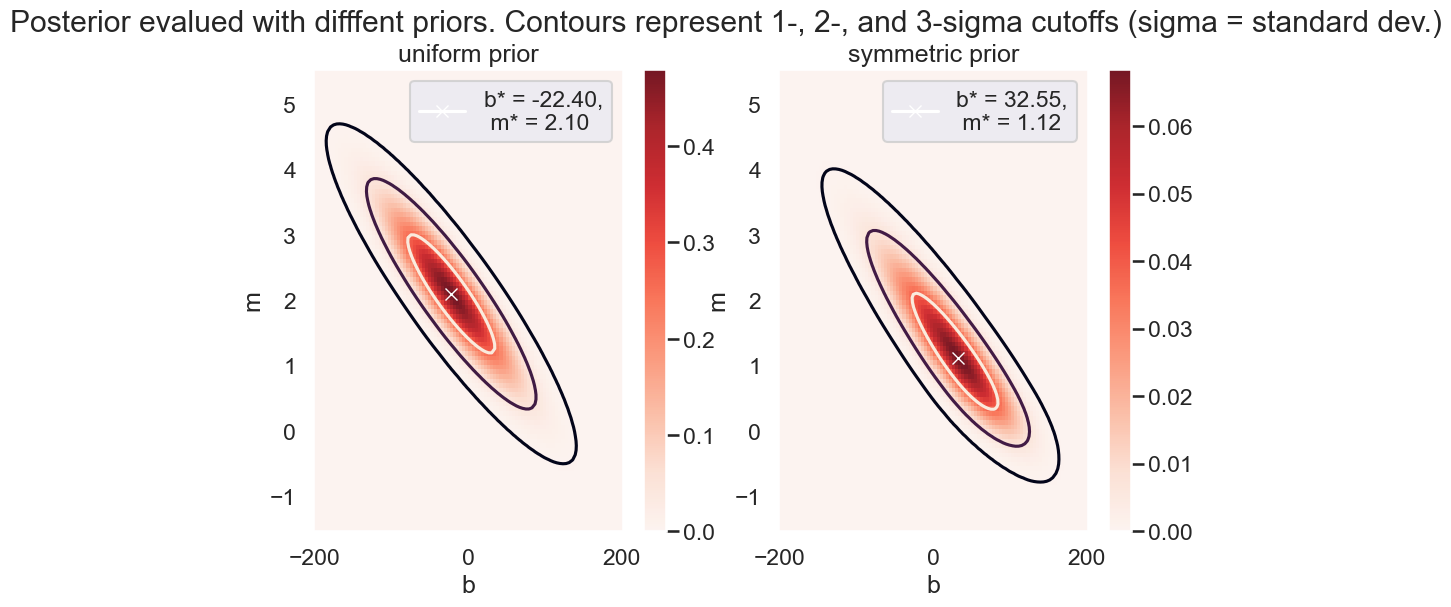

In [181]:
# Grid-evaluation of posterior for contour-level plot

min_b, max_b = -200, 200
min_m, max_m = -1.5, 5.5
n_points = 100

b = np.linspace(min_b, max_b, n_points)
m = np.linspace(min_m, max_m, n_points)
B, M = np.meshgrid(b, m) #theta[0]=intercept=B, theta[1]=slope=M


calc_log_posterior_uniform   = np.zeros_like(B)
calc_log_posterior_symmetric = np.zeros_like(B)

for i in range(n_points):
    for j in range(n_points):
        theta_ij = [B[i,j], M[i,j]]
        calc_log_posterior_uniform[i,j]   = -neg_posterior_uniform_prior(theta_ij)
        calc_log_posterior_symmetric[i,j] = -neg_posterior_symmetric_prior(theta_ij)

        
# take anit-log
calc_posterior_uniform   = np.exp(calc_log_posterior_uniform)
calc_posterior_symmetric = np.exp(calc_log_posterior_symmetric)

contour_uniform   = contour_levels(calc_posterior_uniform)
contour_symmetric = contour_levels(calc_posterior_symmetric)


fig, axs = plt.subplots(1,2, figsize=(11, 6) )
fig.suptitle('Posterior evalued with difffent priors. Contours represent 1-, 2-, and 3-sigma cutoffs (sigma = standard dev.)')
axs[0].contour(B, M, calc_posterior_uniform,   levels=contour_uniform)
axs[0].plot(MAP['uniform_prior'][0], MAP['uniform_prior'][1], marker='x', color='white', label=f"b* = {MAP['uniform_prior'][0]:.2f},\n m* = {MAP['uniform_prior'][1]:.2f}")
axs[0].set_title('uniform prior')
axs[0].set_xlabel('b')
axs[0].set_ylabel('m')
axs[0].legend()

axs[1].contour(B, M, calc_posterior_symmetric, levels=contour_symmetric)
axs[1].plot(MAP['symmetric_prior'][0], MAP['symmetric_prior'][1], marker='x', color='white', label=f"b* = {MAP['symmetric_prior'][0]:.2f},\n m* = {MAP['symmetric_prior'][1]:.2f}")

axs[1].set_title('symmetric prior')
axs[1].set_xlabel('b')
axs[1].set_ylabel('m');
axs[1].legend()

cmesh0 = axs[0].pcolormesh(B, M, calc_posterior_uniform, alpha=0.9, cmap='Reds')
cmesh1 = axs[1].pcolormesh(B, M, calc_posterior_symmetric, alpha=0.9, cmap='Reds');

fig.colorbar(cmesh0, ax=axs[0])
fig.colorbar(cmesh1, ax=axs[1]);


From the contour plots above we see:

   b and m are **negatively correlated** (Cov(b,m) < 0)
   
   this makes sense since  y_th = m * x + b  means that if m is larger, b has to be smaller in order for the line y_th to go through the data points. If m is small, then b has to be large.
   
   This is what the downward sloping ellipses in the graph above means.
   

## Problem 3: MCMC sampling of a Lorentzian pdf using the random walk Metropolis algorithm
### (3 points)
Note that you must solve this problem if you want to solve (extra) problem 5.

Say that we have some function that tells us the (possibly unnormalized) probability of a given position in a one-dimensional space. Note, however, that a key feature of the approach that we will implement here is that it can be extended to many dimensions. 

We will assume a known, specific form of this univariate pdf, namely a Lorentzian (Cauchy) distribution, but it might just as well be some very complicated function that can only be evaluated numerically. All that is needed is some function that, for each position in the parameter space, returns a number that is proportial to the probability density.

Let us start by studying the pdf that we will be sampling from using a random walk (using the Metropolis algorithm outlined below).

In [116]:
# Modules needed for this exercise
from scipy.stats import norm
from scipy.stats import cauchy
# used for plotting 
import seaborn as sns
sns.set('talk')

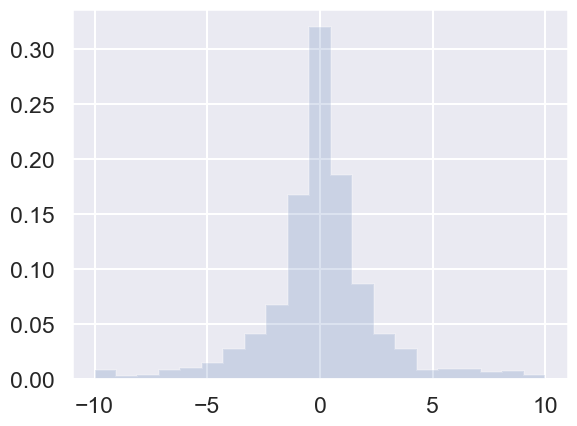

In [117]:
# Draw a number of random samples from the standard Cauchy
r = cauchy.rvs(size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, 
         range=(-10,10),bins=21);

This histogram corresponds to a finite sample from the pdf of a standard Cauchy (Lorentzian)
$$ 
p(x | \alpha=0, \beta=1) = \frac{1}{\pi(1+x^2)}, 
$$
with mean $\alpha=0$ and FWHM $2\beta = 2$.

Questions to ponder (not part of this problem; need not be answered in the notebook):
- How does this pdf compare with a standard normal distribution $\mathcal{N}(x;\mu=0,\sigma^2=1)$?
- The Cauchy distribution is often used in statistics as the canonical example of a "pathological" distribution since both its mean value and its variance are undefined. Do you see mathematically why these moments are undefined?

First, turn the posterior into a callable function. You should deliberately remove the normalization to make the point that sampling can be made for an unnormalized pdf. Note that we will work directly with the pdf here (not taking the log as in previous examples).

In [118]:
def posterior_function(x, normalized=False):
    '''
    Return the posterior pdf given by a standard Cauchy (Lorentzian).
    
    Args:
                 x: position in a one-dimensional space
        normalized: Return a normalized pdf if True (optional, default=False)
    '''    
    posterior = 1 / (1 + x**2)
    
    if normalized:
        posterior /= np.pi

    return posterior

In [119]:
# Predefined function for visualization.
# No changes are needed.
# The distplot method is a deprecated function and will be removed in a future version.
# Remove warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_proposal(posterior_func, current_position, p_current, 
                  proposed_position, p_proposal, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
    fig.suptitle('Iteration %i' % (i + 1),fontsize=14)
    x = np.linspace(-5, 5, 5000)
    color = 'g' if accepted else 'r'
    label_text = 'Accepted' if accepted else 'Rejected'
        
    # Plot posterior
    ax1.plot(x, posterior_func(x))
    ax1.plot([current_position] * 2, [0, p_current], marker='o', color='b')
    ax1.plot([proposed_position] * 2, [0, p_proposal], marker='o', color=color)
    ax1.annotate("", xy=(proposed_position, 0.2), xytext=(current_position, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', \
            title=f'current: posterior(x={current_position:.2f}) = {p_current:.2f}\n'+\
            f'proposal: posterior(x={proposed_position:.2}) = {p_proposal:.2}')
    
    if accepted:
        trace.append(proposed_position)
    else:
        trace.append(current_position)
        
    # Posterior histogram
    ax2.plot(x, posterior_function(x, normalized=True)) # properly normalized
    sns.distplot(trace, kde=False, norm_hist=True, ax=ax2)
    ax2.axvline(current_position, color='b', linestyle='--', 
                label='current position')
    ax2.axvline(proposed_position, color=color, linestyle='--', 
                label='proposed position')
    ax2.annotate("", xy=(proposed_position, 0.2), xytext=(current_position, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.annotate(label_text, xy=(proposed_position, 0.5), color=color,rotation=270,fontsize=14)

    
    ax3.plot(trace)
    ax3.set(xlabel='iteration', ylabel='position', title='trace')
    plt.tight_layout()

Now on to the sampling. The code for a MCMC sampler that uses the Metropolis algorithm is enclosed below. However, it misses a few critical ingredients and it is your task to add them at the correct places.

1. At first, you have to specify the initial parameter position (that can be randomly chosen), lets fix it to the input argument `start_position`:

```python
current_position = start_position
```

Then, you propose to move (jump) to another position. You can be very dumb or very sophisticated about how you come up with the proposed jump. The Metropolis sampler is rather dumb and just picks a sample from a symmetric proposal distribution (here we again choose a normal distribution) centered around your current position (i.e. `current_position`) with a certain standard deviation (`proposal_width`) that will determine the length scale for proposed jumps 

2. Use `scipy.stats.norm` to create `proposed_position` as a random variable that has the mean value equal to the `current_position` and a standard deviation that is given by `proposal_width`.

Next, you evaluate whether that new position is indeed a good place to jump to, or not. We quantify this by comparing the probability density at the `proposed_position` in parameter space with the one for the `current_position`. Usually you would use the logarithms of the probability densities but we omit this here.

3. Compute both `p_current` and `p_proposal`.

Up until now, we essentially have a hill-climbing algorithm that would just propose movements into random directions and only accept a jump if the `proposed_position` has higher probability density than `current_position`. Eventually we'll get to `x = 0` (or close to it) from where no more moves will be accepted. However, we want to get samples from a pdf so we'll also have to sometimes accept moves into regions of lower probability. The key trick is to divide the two probabilities,

```python
p_accept = p_proposal / p_current
```

and to interpret this ratio as an acceptance probability. Note that the acceptance probability is obtained by dividing the pdf of the proposed parameter setting by the pdf of the current parameter setting. This implies that the probability density does not necessarily need to be nomalized, the normalization factor will anyway cancel out. 

You can see that if `p_proposal` is larger, the acceptance probability will be `> 1` and we'll definitely accept the jump. However, if `p_current` is larger, say twice as large, there'll be a 50% chance of moving there, which we will decide by drawing a random number.

4. Add the acceptance step by comparing `p_accept` to a random number (uniform [0,1]). The `current_position` should be updated if the `accept` variable is `True`. 

Note that the `current_position` is added to our list of parameter samples at the end of the iteration, regardless of it being a new position or not.

This simple procedure gives us samples from the pdf.

The code below also calls a fancy visualization function `plot_proposal` if the optional keyword argument `plot=True`.

In [120]:
def sampler(posterior_func, no_of_samples=4, start_position=.5, 
            proposal_width=1., plot=False):
    '''
    Simple (but incomplete) Metropolis sampler function.
    
    Args:
        posterior_func: Function that takes a single positional argument and returns 
            the (possibly unnormalized) pdf value.
        no_of_samples: (integer) Number of samples that will be returned (excluding the start position). 
            (default=4)
        start_position: (float) Start position. (default=0.5)
        proposal_width: (float) Width of Gaussian proposal distribution. (default=1.)
        plot: (Boolean) Make visualization (default=False)
        
    Returns:
        samples: Array of floats. Length = no_of_samples+1
    '''
    
    current_position = start_position
    accept = []
    samples = [current_position]
    
    for i in range(no_of_samples):
        
        proposed_position = norm.rvs(loc=current_position, scale=proposal_width, size=1)
          # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=norm#scipy.stats.norm
        
        # Compute posteriors of current and proposed position       
        p_current  = posterior_func(current_position)
        p_proposal = posterior_func(proposed_position) 
        
        p_accept = p_proposal / p_current
    
        # Visualization
        if plot:
            
            assert no_of_samples < 11, "Too many samples for visualization"               
            plot_proposal(posterior_func, current_position, p_current, 
                          proposed_position[0], p_proposal[0], accept, samples, i) #index to please the formatted string in plot_proposal
        
        # Possibly update positions
        if p_accept > stats.uniform.rvs(size=1):
            current_position = proposed_position[0] #index to please the formatted string in plot_proposal
            accept.append(True)
        else:
            accept.append(False)
        
        samples.append(current_position)
        
    return np.array(samples)

In [121]:
np.random.seed(2020)
test_samples = sampler(posterior_function, no_of_samples=2)
assert test_samples[0]==0.5, 'The first position sample should be the defalut start position = 0.5'
assert np.abs(test_samples[1]-(-1.26884571))<0.001, 'The first sample given the default proposal'+\
    ', the correct posterior_function and the provided random seed.'

#### Visualization of Metropolis sampling procedure:
To visualize the sampling, we'll create plots for some quantities that are computed. Each row below is a single iteration through our Metropolis sampler. These tests will also allow you to check whether your sampler works as expected.

The first column displays our unnormalized posterior distribution. This is for visualization only, normally we would not be able to plot a nice curve to show the posterior. Here, we plug in our $x$ proposals. The vertical lines represent our current position in blue and our proposed position in either red or green (rejected or accepted, respectively). 

The 2nd column is our posterior distribution. Here we are displaying the normalized posterior as the blue curve compared to the normalized histogram of samples (green bars) and the move that was just proposed.

The 3rd column is our trace (i.e. the posterior samples of visited positions that we're generating). Note that we store a sample at each iteration, irrespective of whether the proposal was accepted or rejected. In the latter situation, we keep the previous position and the line just stays constant.

Note that we always accept moves to relatively more likely $x$ values (in terms of their posterior density), but only sometimes to relatively less likely $x$ values, as can be seen already in the first iteration, and later in iterations 6, 7, and 8 (the iteration number can be found at the top center of each row).

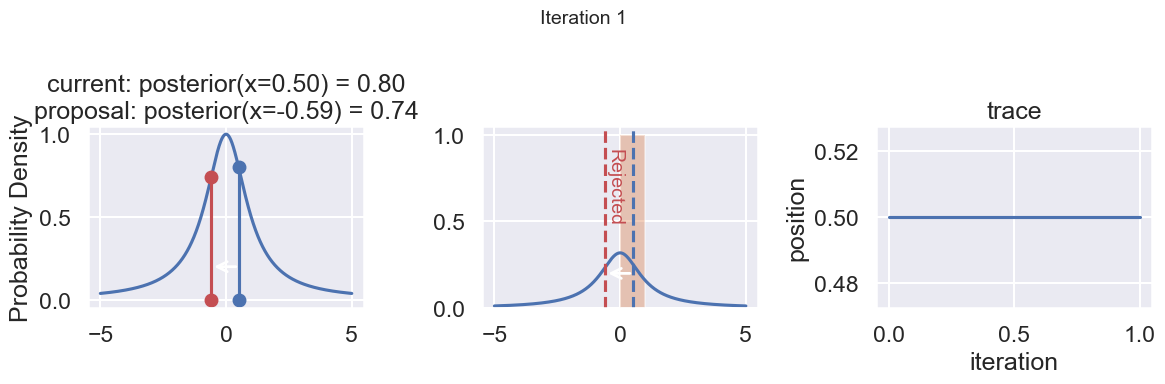

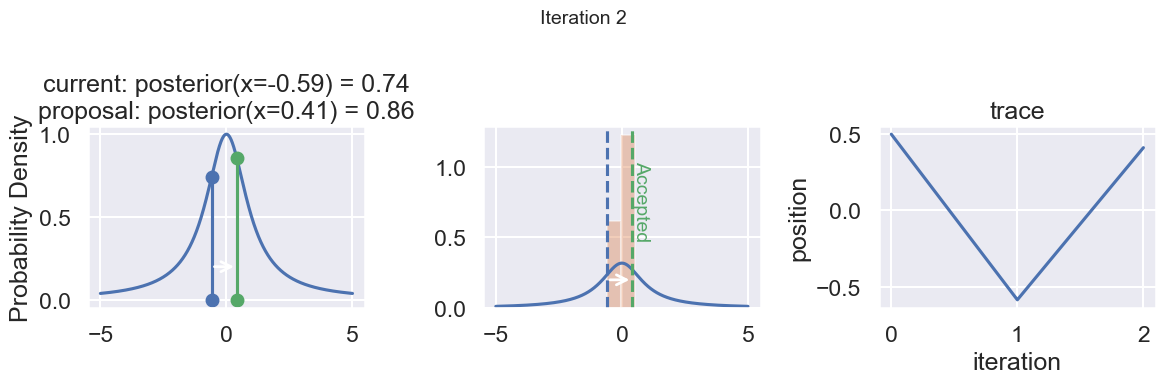

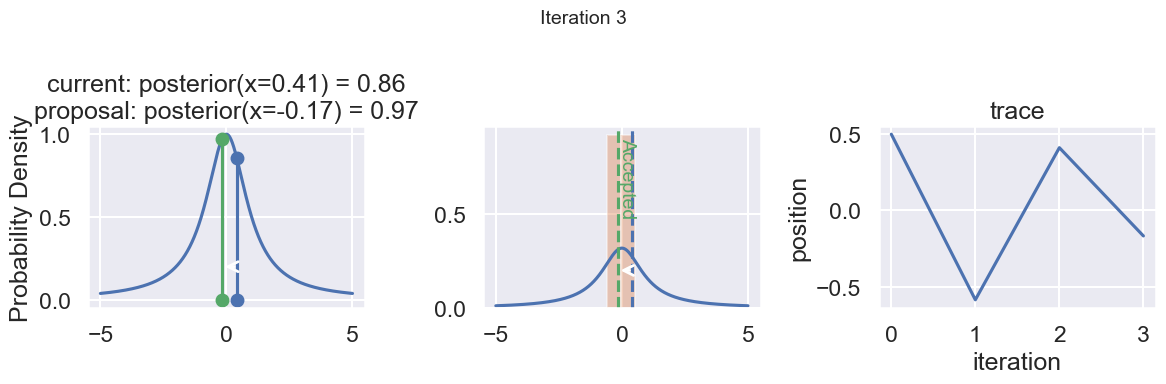

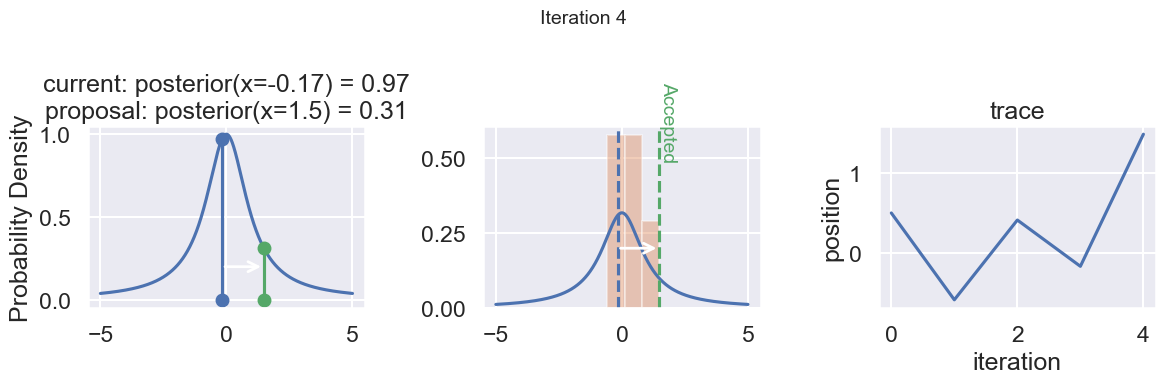

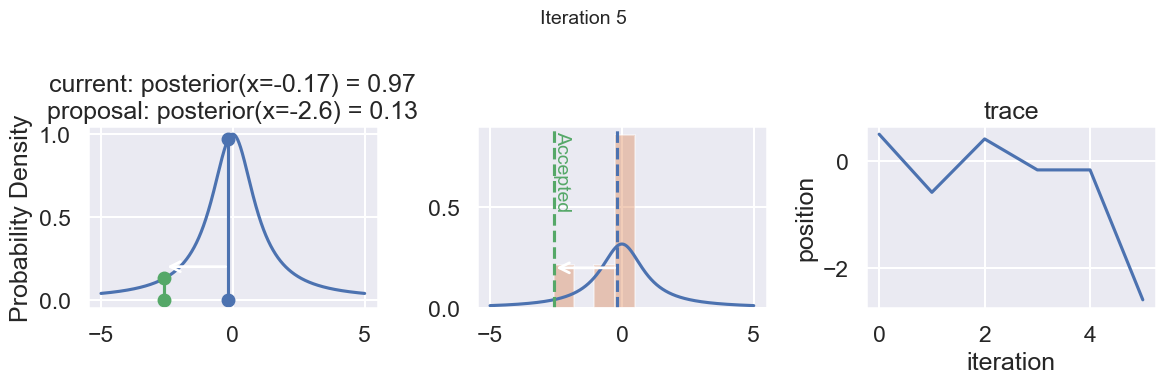

In [122]:
np.random.seed(123)
try:
    samples = sampler(posterior_function, no_of_samples=5, start_position=.5, proposal_width=1., plot=True);
except:
    print('The method "sampler" must be defined and working as expected.')

array([ 0.5       ,  0.07108737, -0.60779878, -0.70250775, -1.14648971,
       -1.58084098])

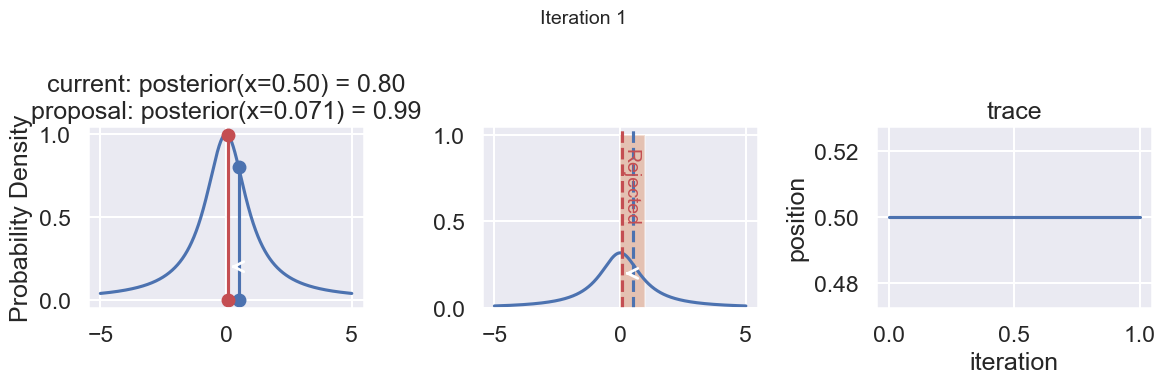

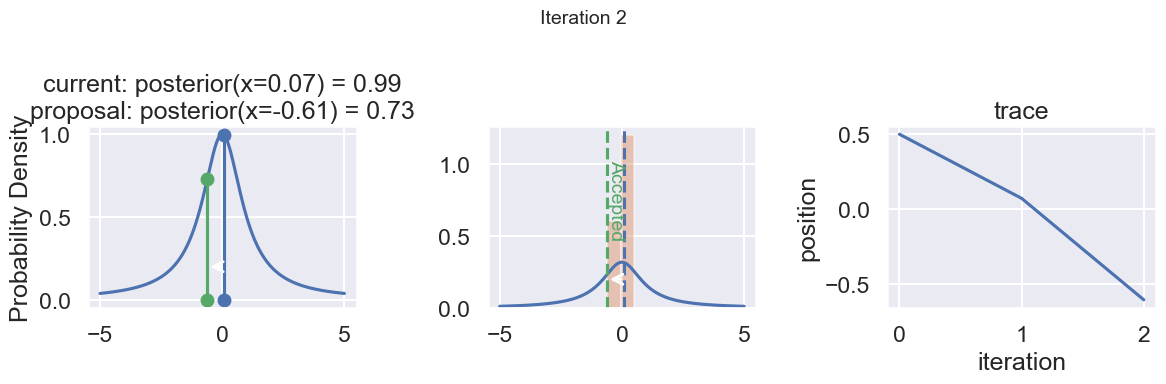

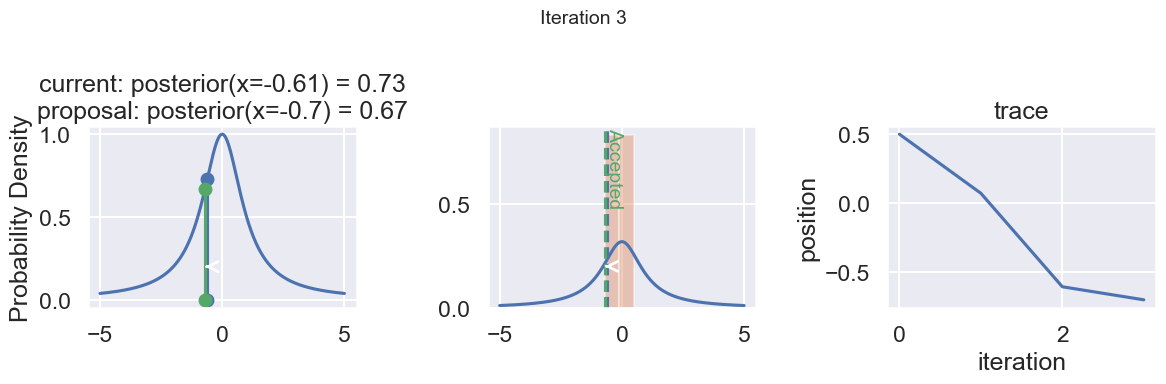

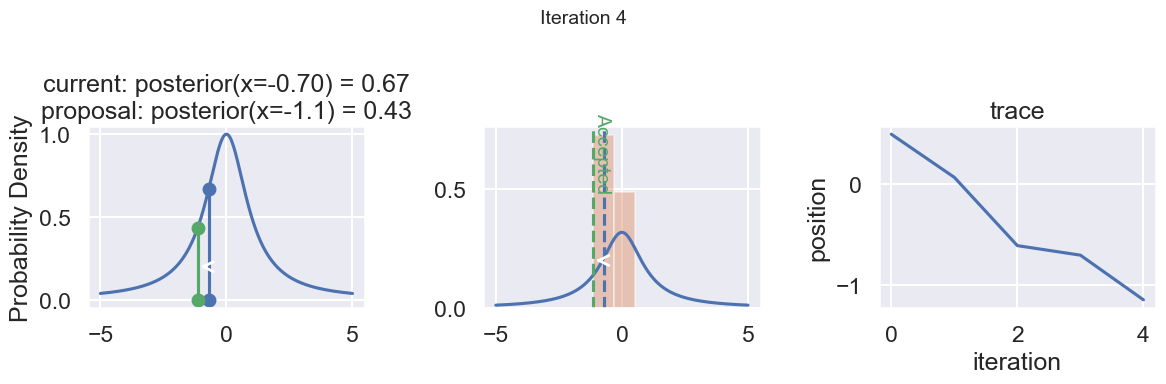

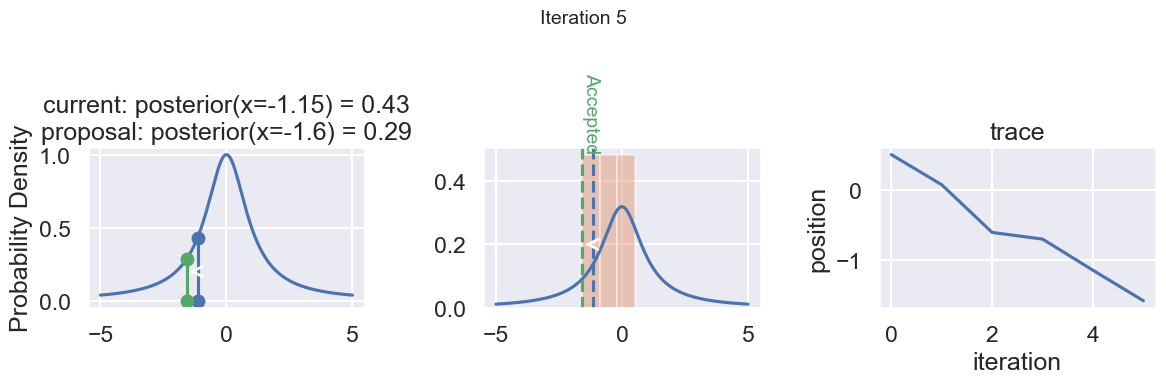

In [123]:
sampler(posterior_function, no_of_samples=5, start_position=.5, proposal_width=1., plot=True)

Now the magic of MCMC is that you just have to do that for a long time, and the samples that are generated in this way come from the posterior distribution of your model. There is a rigorous mathematical proof that guarantees this which we won't go into detail here.

#### Final task:
Draw 100,000 samples from your sampler and plot:
* The trace (i.e. the sequence of draws of your single parameter x)
* A normalized histogram of the samples compared to the true posterior pdf (normalized).

In [134]:
try:
    samples = sampler(posterior_function, no_of_samples=100000, start_position=1.)
except:
    samples=None
    print('The method "sampler" must be defined and working as expected.')

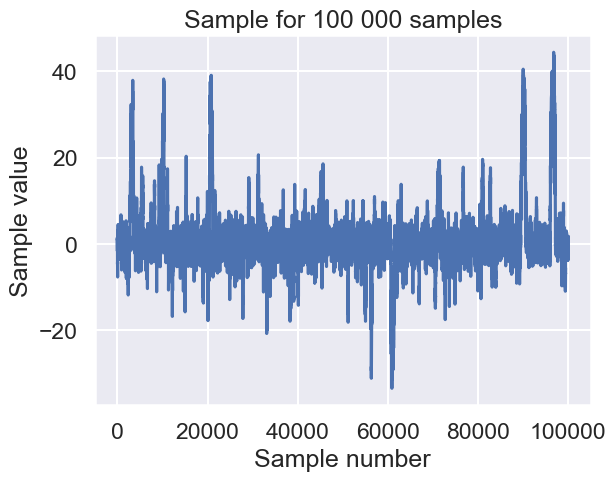

In [135]:
plt.plot(samples)
plt.title('Sample for 100 000 samples')
plt.xlabel('Sample number')
plt.ylabel('Sample value');

Text(0, 0.5, 'P(x)')

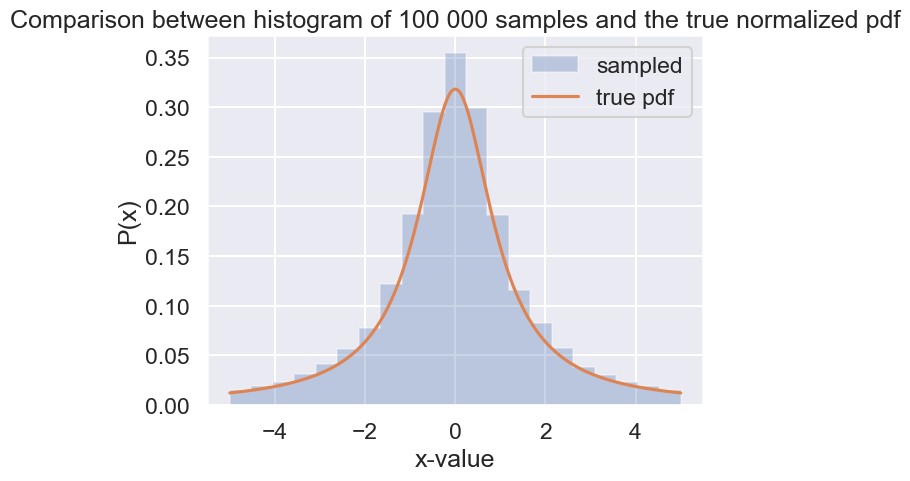

In [136]:
plt.hist(samples, density=True, histtype='stepfilled', alpha=0.3, 
         range=(-5,5),bins=21, label='sampled');
x = np.linspace(-5,5, 200)
plt.plot(x, posterior_function(x, normalized=True), label='true pdf')
plt.title('Comparison between histogram of 100 000 samples and the true normalized pdf')
plt.legend()
plt.xlabel('x-value')
plt.ylabel('P(x)')

In [131]:
assert np.abs(np.median(samples))<0.2, f'The median of the samples is {np.median(samples):.1}. It should be close to the median of the posterior pdf (=0.0)'

## Problem 4: Signal and background
### (3 points)
This problem is more demanding than the other basic problems. Note that you must solve this problem if you want to solve (extra) problem 5.

The goal of this problem is to estimate the amplitude of a signal when there is a background.  We'll take a limiting case where the background is flat, so it is completely specified by its magnitude $B > 0$, and the signal is known to be a Gaussian with unknown amplitude $A$ but known position (mean) and width (standard deviation). 

The measurements will be integer numbers of counts $\{N_k\}$ in well-defined (equally spaced) bins $\{x_k\}$. The index $k$ runs over integers labeling the bins.

We can imagine three different goals of the data analysis:
- Finding $A$ and $B$ given $\{N_k\}$.
- Finding $A$ (we do not care about $B$).
- Finding $B$ (we do not care about $A$).

In all cases we consider the bin sizes and the signal shape (including its mean position and width) as known information.

Our statistical model includes the true signal plus a constant background. The signal and the background magnitudes are the unknown parameters while the other parameters dictating the signal (width $w$ and mean $x_0$ of the Gaussian) are known and fixed:

$$
   D_k = n_0 \left[ A e^{-(x_k-x_0)^2/2 w^2} + B \right]
$$

Here $n_0$ is a constant that scales with measurement time.  Note that $D_k$ is not an integer in general, unlike $N_k$.

In [137]:
# import statements.
# We use pickle to save and load a python dictionary
%matplotlib inline

import pickle
import numpy as np
from scipy.special import loggamma #for logarithm of factorial

# import additional modules as needed
# YOUR CODE HERE

In [138]:
# This function generates data according to the statistical model
A_true = 1.
B_true = 2.

def exact_data(A, B, n_0, x_k, x_0=0., width=np.sqrt(5.)):
    """
    Return the exact signal plus background.  The overall scale is n_0,
    which is determined by how long counts are collected. 
    The default signal position and width are 0.0 and sqrt(5), respectively (in some  irrelevant units).
    """
    return n_0 * (A * np.exp(-(x_k - x_0)**2/(2.*width**2)) + B)

#### Poisson distribution
We are imagining a counting experiment, so the statistics of the counts we record will follow a Poisson distribution. It might be an interesting exercise to derive why this distribution is expected for a counting experiment. 

The Poisson discrete random variable from scipy.stats is defined by (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html))

$$
p(k \mid \mu) = \frac{\mu^k e^{-\mu}}{k!} \quad \mbox{for }k\geq 0 \;.
$$

where $k$ is an integer and $\mu$ is called the shape parameter. The mean and variance of this distribution are both equal to $\mu$. Sivia and Gregory each use a different notation for for this distribution, which means you need to be flexible. 

For convenience, we'll define our own version in this notebook:

$$
p(N \mid D) = \frac{D^N e^{-D}}{N!} \quad \mbox{for }N\geq 0 \;.
$$

where $N$ is an integer.

In [139]:
# make a dataset for exploring
def make_dataset(A_true, B_true, width, x_0, databins=15, delta_x=1, D_max=100):
    """
    Create a data set based on the number of bins (databins), the spacing
    of bins (delta_x), and the maximum we want the exact result to have
    (D_max, this fixes the n_0 parameter).
    
    Return arrays for the x points (xk_pts), the corresponding values of the
    exact signal plus background in those bins (Dk_pts), the measured values
    in those bins (Nk_pts, integers drawn from a Poisson distribution), the 
    maximum extent of the bins (x_max) and n_0.
    """
    # set up evenly spaced bins, centered on x_0
    x_max = x_0 + delta_x * (databins-1)/2
    xk_pts = np.arange(-x_max, x_max + delta_x, delta_x, dtype=int)
    
    # scale n_0 so maximum of the "true" signal plus background is D_max
    n_0 = D_max / (A_true + B_true)  
    Dk_pts = exact_data(A_true, B_true, n_0, xk_pts, width=width)
    
    # sample for each k to determine the measured N_k
    Nk_pts = [stats.poisson.rvs(mu=Dk) for Dk in Dk_pts]
    
    return xk_pts, Dk_pts, Nk_pts, x_max, n_0

#### Plot the signal and the data (these tasks are not graded but will help you to understand the problem)
* Make a plot of the true signal plus background we are trying to deduce. Use $A_\mathrm{true}=1$ and $B_\mathrm{true}=2$ and the signal position (mean) $x_0=0$ and width (standard deviation)  $w=\sqrt{5}$.

We consider what happens for fixed signal and background but changing the experimental conditions specified by `D_max` and `databins` (we'll keep `delta_x` fixed to 1). In all cases the bins are symmetric around $x=0$.

The pickle file that is loaded in the cell below contains data from four differently designed counting experiments.:
1. Baseline case: 15 bins and maximum expection of 100 counts per bin.
1. Low statistics case: 15 bins and maximum expection of only 10 counts per bin.
1. Greater range case: 31 bins (with fixed bin width) and maximum expection of 50 counts per bin to give approximately the same total number of counts as in baseline case.
1. Smaller range case: 7 bins (with fixed bin width) and maximum expection of 200 counts per bin to give approximately the same total number of counts as in baseline case.
 
* Make four subplots that correspond to the data from the different experiments.

Loaded "data" dictionary from file.
Extract data with:
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]
where the key "case" is one of:
dict_keys(['Baseline', 'Low Statistics', 'Greater Range', 'Smaller Range'])


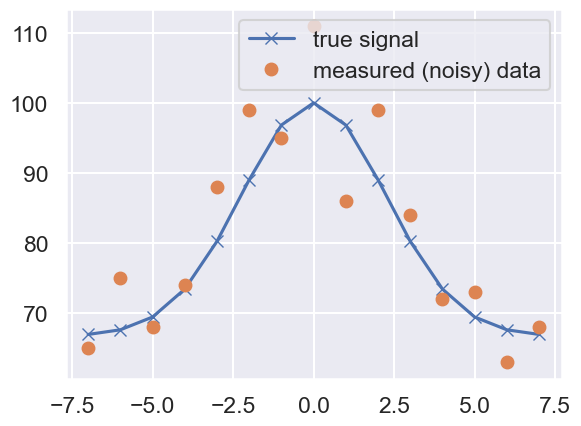

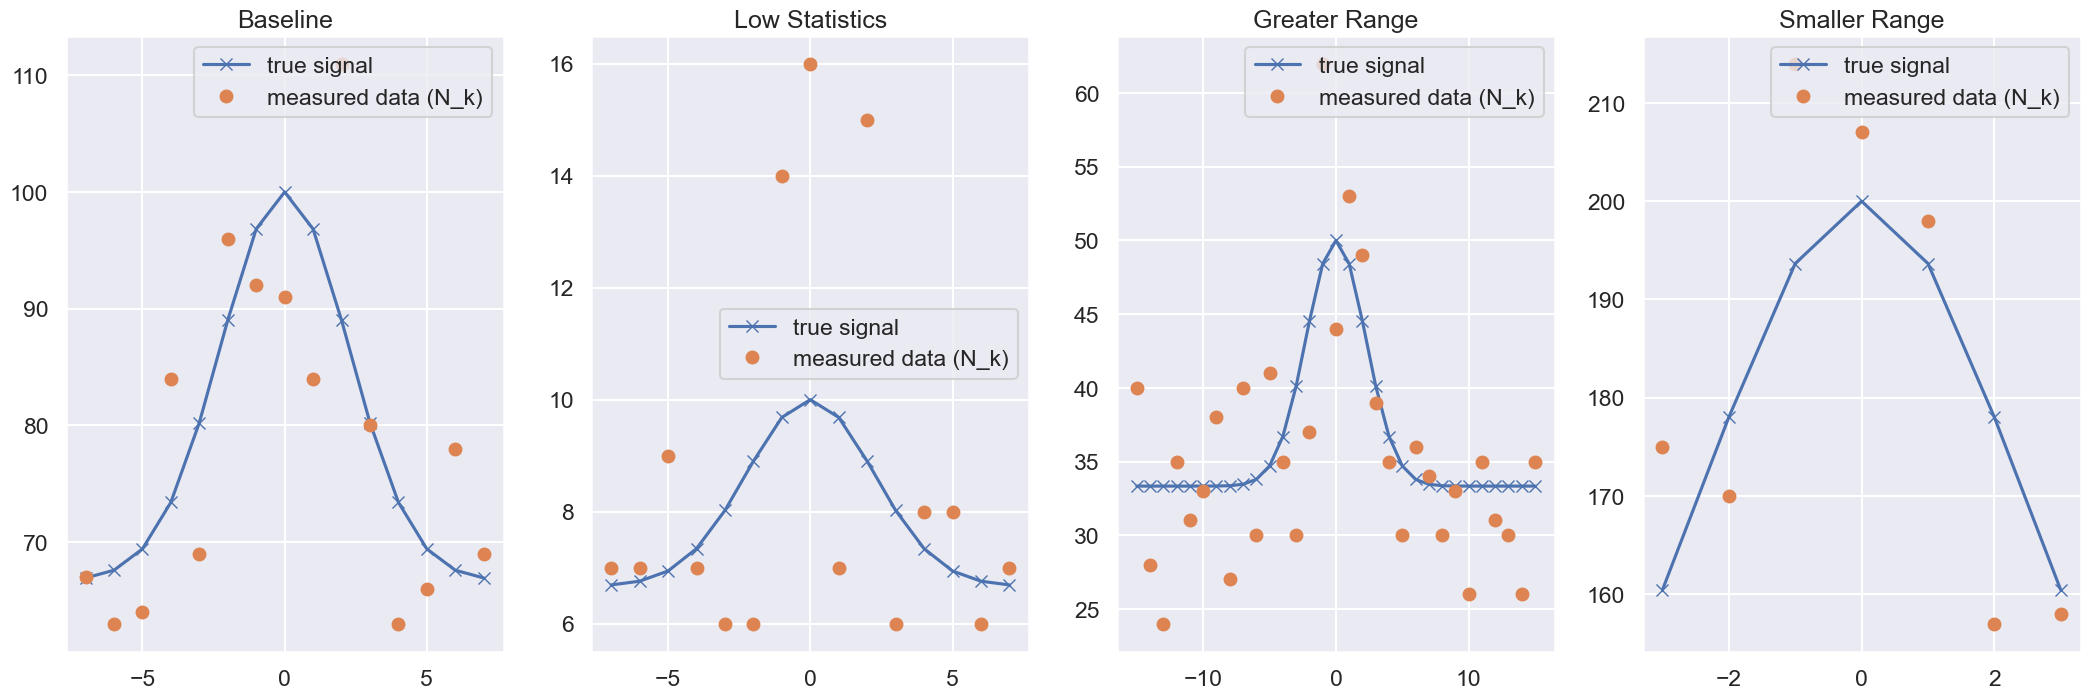

In [140]:
# Plotting the signal and background

np.random.seed(40)
A_true = 1.0
B_true = 2.0
x_0 = 0.0
width = np.sqrt(5.0)

xk_pts_data, Dk_pts_data, Nk_pts_data, x_max_data, n_0_data = make_dataset(A_true, B_true, width, x_0)

plt.plot(xk_pts_data, Dk_pts_data, 'x-', label='true signal')
plt.plot(xk_pts_data, Nk_pts_data, 'o', label='measured (noisy) data')
plt.legend()


# The data has been generated already and will be loaded from a pickle file.
# It is a dictionary with four keys corresponding to the four cases, and each value
# corresponding to xk_pts, Dk_pts, Nk_pts, x_max, n_0
with open(f'{DATA_DIR}/data_signal_and_background.pickle','rb') as f:
    data = pickle.load(f)
    print('Loaded "data" dictionary from file.')
    print('Extract data with:')
    print('xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]')
    print('where the key "case" is one of:')
    cases = data.keys()
    print(cases)


# Plotting the data for the four cases
keys = ['Baseline', 'Low Statistics', 'Greater Range', 'Smaller Range']
fig, axs = plt.subplots(1, len(keys), figsize=(26,8))

for i, key in enumerate(keys):
    axs[i].plot(data[key][0], data[key][1], 'x-', label='true signal')
    axs[i].plot(data[key][0], data[key][2], 'o', label='measured data (N_k)')
    axs[i].set_title(key)
    axs[i].legend()


#### Graded subtasks
##### Subtask a. [2 points]
* Implement functions for the (log) likelihood and for a uniform (log) prior. Let's use a uniform prior for $0 \le A \le 5$ and $0 \le B \le 5$.
* Evaluate the log-posterior on a grid and then: 
  - Plot the joint posterior pdf for $A$ and $B$ for the four cases.
  - Plot the marginalized posterior pdf for the signal amplitude $A$ for the four cases.
  - Plot the marginalized posterior pdf for the background $B$ for the four cases.
  
  Use the same axis scales for all four cases such that the precision of the inference can be compared.

In [141]:
# Define the pdfs and combine with Bayes' theorem.

def log_prior(A, B):
    """
    Log prior .
    
    We take a uniform (flat) prior with large enough
    maximums but, more importantly, require positive values for A and B.
    """
    A_max = 5.
    B_max = 5.
    # flat prior 
    if np.logical_and(A <= A_max, B <= B_max).all(): 
        return np.log(1/(A_max * B_max))
    else:
        return -np.inf

def log_likelihood(A, B, xk_pts, Nk_pts, n_0):
    """
            Log likelihood for data Nk_pts given A and B
    """
    # P(N|D) = D^N * exp(-D) / N! and so
    # P(N|A,B,I) =  (n_0 * (A*exp(-(x_k^2/(2*w^2))) + B))^N * exp(-[n_0 * (A*exp(-(x_k^2/(2*w^2))) + B)]) / N!
    # likelihood becomes: P({N_k}|A,B,I) = prod_k P(N_k|A,B,I)
    # where P(N_k|A,B,I) = P(N|A,B,I) as above. Taking the log and simplifying (done on paper), it becomes
    # log( P({N_k}|A,B,I) ) = sum_k [N_k*log(D_k) - D_k - log(N_k!) ]
    # where D_k = n_0 * (A*exp(-(x_k^2/(2*w^2))) + B) 
    
    assert len(xk_pts) == len(Nk_pts), f'Nk_pts and xk_pts must have same length, they have len(xk_pts)={len(Nk_pts)} and len(xk_pts)={len(Nk_pts)}'
    logL = 0
    
    for i, N_k in enumerate(Nk_pts):
        x_k = xk_pts[i]
        D_k = n_0 * ( A * np.exp( -((x_k - x_0)**2 / (2*width**2)) ) + B ) #width defined earlier in code
        
        term_1 = N_k * np.log(D_k)
        term_2 = -D_k
        term_3 = -loggamma(N_k + 1) #gamma(n) = (n-1)!  ==>  gamma(n+1) = n!
        
        logL += term_1 + term_2 + term_3
    
    return logL

def log_posterior(A, B, xk_pts, Nk_pts, n_0):
    """Log posterior for data Nk_pts given A and B"""
    return log_likelihood(A, B, xk_pts, Nk_pts, n_0) + log_prior(A, B)


In [142]:
# Meshgrid
epsilon = 0.00001 # small > 0, else log() is sad
min_a, max_a = epsilon, 5
min_b, max_b = epsilon, 5
n_points_linspace = 150
a, b = np.linspace(min_a, max_a, n_points_linspace), np.linspace(min_b, max_b, n_points_linspace)
A, B = np.meshgrid(a, b)


# Evaluate log-posterior on grid
calc_log_posterior = [[], [], [], []]
calc_posterior     = [[], [], [], []]

for i, key in enumerate(keys):
    # columns in 'data', for a given key, correspond to: xk_pts, Dk_pts, Nk_pts, x_max, n_0
    xk_pts_i = data[key][0]
    Nk_pts_i = data[key][2]
    n_0_i    = data[key][4]
    
    calc_log_posterior[i] = log_posterior(A, B, xk_pts_i, Nk_pts_i, n_0_i) 
    calc_posterior[i] = np.exp(calc_log_posterior[i])


In [143]:
# Optional.
# Code to find contour levels of gridded 2D posterior.

def find_contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior
       Note: taken from BayesianAstronomy but may not work here.
    """
    sorted_ = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(sorted_) / np.sum(sorted_)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(sorted_[cutoffs])

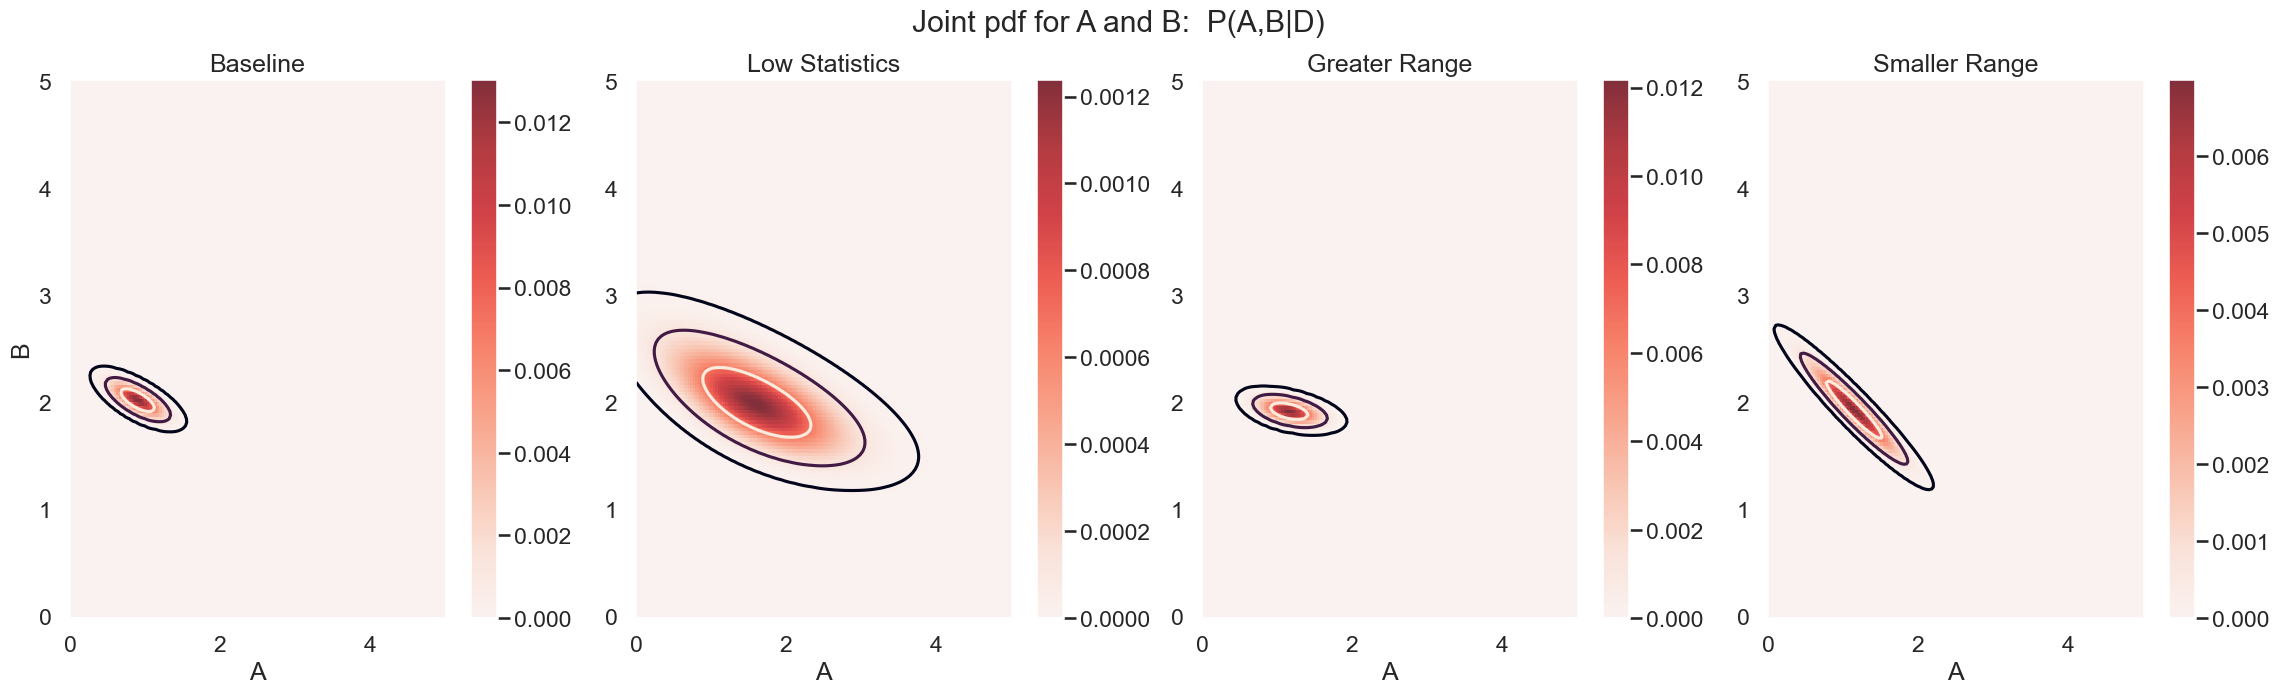

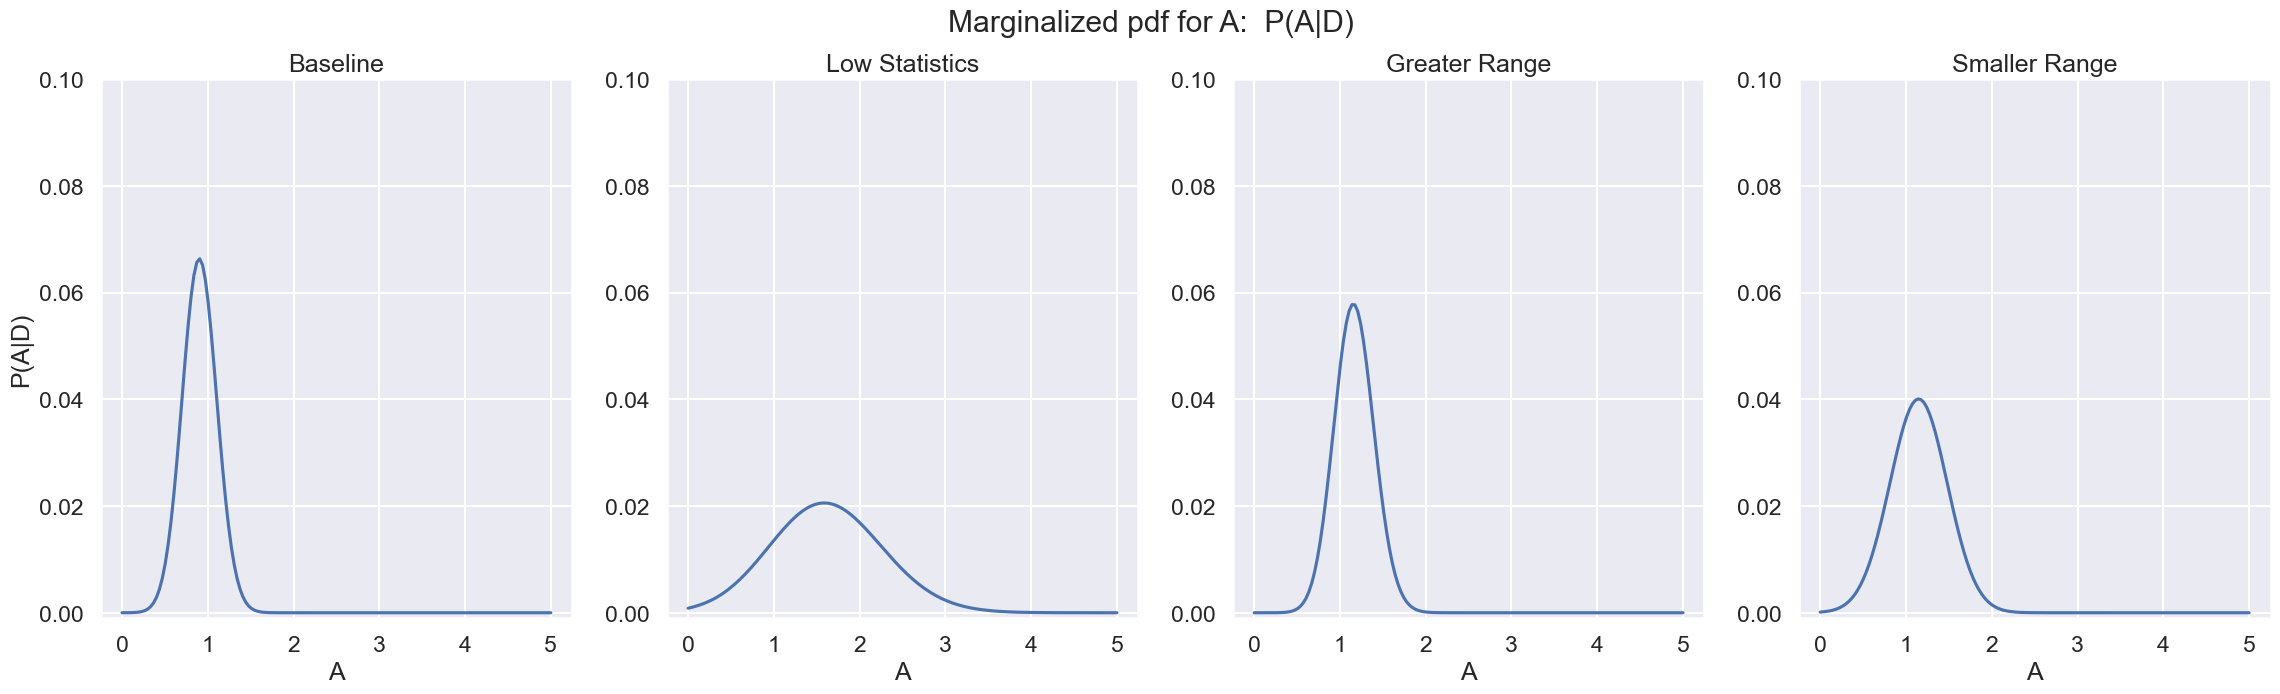

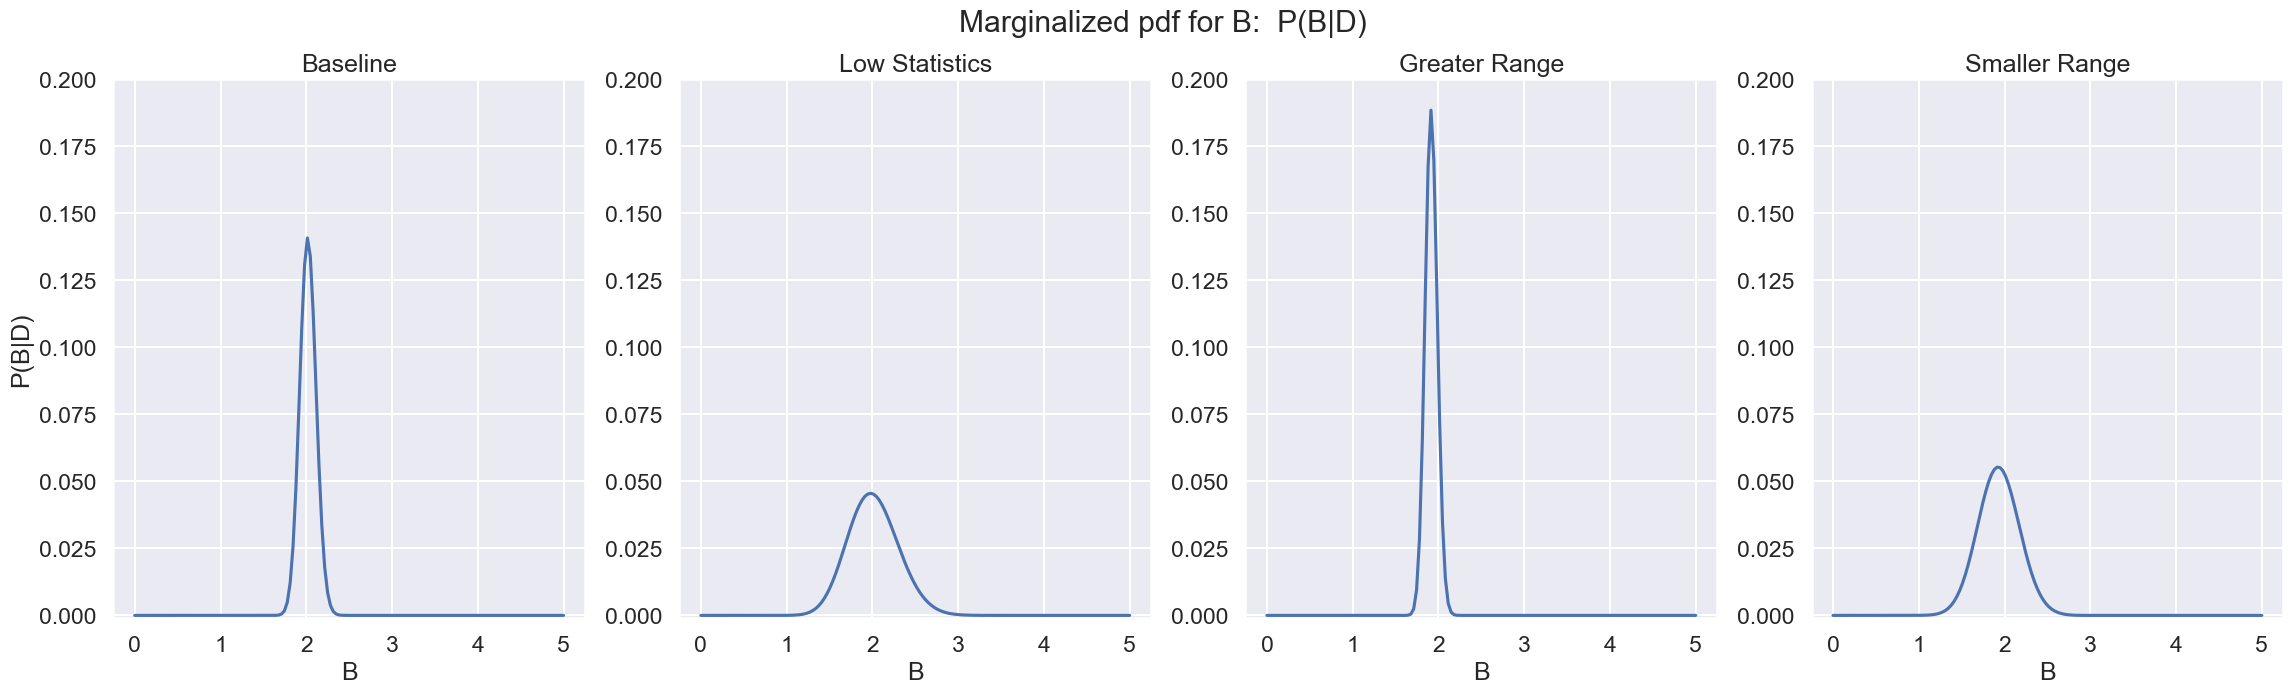

In [144]:
# NORMALIZE PDF

pdf_AB_unnormalized = calc_posterior
pdf_AB = np.zeros_like(pdf_AB_unnormalized)

for i in range(len(pdf_AB_unnormalized)):
    norm_constant_i = np.sum(pdf_AB_unnormalized[i])
    pdf_AB[i] = pdf_AB_unnormalized[i] / norm_constant_i
    #print(np.sum(pdf_AB[i])) #check the normalization

# JOINT PDF FOR A AND B
fig, axs = plt.subplots(1, len(keys), figsize=(28,7))
fig.suptitle('Joint pdf for A and B:  P(A,B|D)')

for i, key in enumerate(keys):
    contour_levels_i = find_contour_levels(pdf_AB[i])
    axs[i].contour(A, B, pdf_AB[i], levels=contour_levels_i)
    if i == 0:
        axs[i].set(xlabel='A', ylabel='B', title=key)
    else:
        axs[i].set(xlabel='A', title=key)
        
    pcolormesh = axs[i].pcolormesh(A, B, pdf_AB[i], cmap='Reds', alpha=0.8)
    fig.colorbar(pcolormesh, ax=axs[i])


    
# MARGINALIZED PDF: ONLY A
 # Marginalized pdf:  p(A) = sum_i p(A, B_i)
 # and 'pdf_AB' is a 2D pdf with A as rows and B as columns

fig, axs = plt.subplots(1, len(keys), figsize=(28,7))
fig.suptitle('Marginalized pdf for A:  P(A|D)')
for i, key in enumerate(keys):
    pdf_A_i = pdf_AB[i].sum(axis = 0) #collapse (sum) columns to get A as row
    axs[i].plot(a, pdf_A_i)
    if i == 0:
        axs[i].set(xlabel='A', ylabel='P(A|D)', title=key, ylim=(-0.001, 0.1))
    else:
        axs[i].set(xlabel='A', title=key, ylim=(-0.001, 0.1))



# MARGINALIZED PDF: ONLY B

fig, axs = plt.subplots(1, len(keys), figsize=(28,7))
fig.suptitle('Marginalized pdf for B:  P(B|D)')
for i, key in enumerate(keys):
    pdf_B_i = pdf_AB[i].sum(axis = 1) #collapse (sum) rows to get B as column
    axs[i].plot(b, pdf_B_i)
    if i == 0:
        axs[i].set(xlabel='B', ylabel='P(B|D)', title=key, ylim=(-0.001, 0.2))
    else:
        axs[i].set(xlabel='B', title=key, ylim=(-0.001, 0.2))


##### Subtask b. [1 points]
* Use the text cell below to discuss the following questions:
  1. Can you understand why the signal and background amplitudes are anticorrelated? And why the (anti)correlation seems to be stronger in one of the cases? 
  1. Can you understand the difference in widths of the pdfs in the four cases?
  1. What are your conclusions for how to design the experiment given limited resources? 
    - In particular, given that you wanted to be able to distinguish between signal amplitude and background, would it then be better to have many counts in few bins, or the same total amount of counts spread over a wider interval? 

1. **Cov(A,B) < 0** in all four cases.

   So, if we have a clear signal (A) then the noise (B) is small (relatively)
   
   If we would have a large noise (B), then the signal wouldn't be clear - it would be small (A).
   
   Therefore if A large --> B small, and B large --> A small, which we recognize as anti-correlated  
   
   And the anti-correlation is stronger for Smaller Range. Smaller range means fewer bins with only noise, and so all our data contains both A and B. Therefor it is harder to distinguish between the two, meaning the reasoning above is even more prevalent. 

2. For **B**:
    
   with Greater Range we see a smaller width for P(B|D).
   
   In the limiting case of an infinite range, B would be well-defined as having the amplitude of the flat line (except for the small range in which the peak of A is) we would see.
   
   Greater Range --> more bins containing only B --> smaller width in pdf.
   
   Smaller Range gives a larger width, even with more counts per bin. This is because we have fewer bins of B.
   
   Low Statistics give an even larger width --> we have less data per bin and so it becomes more sensitive to random noise.
  
  
   For **A**:
   
   Greater Range and Baseline are more or less the same width. 
   
   Greater Range have more bins than Baseline, but both cover the portion of the measurement where we actually measure A (signal), and the extra range *outside* of where we measure A does not matter since we get no information about A there (because we get proportionally fewer counts where the signal A is included)
 
   Low Statistics really punishes the pdf for A. With only 10 counts per bin, and not that many bins where the signal is, it is very sensitive to random noise. The actual amplitude A for the signal is spread out (larger width) because of the not-so-many datapoints.
   
   It is much the same for Smaller Range --> few bins where we actually measure A and even if we have many datapoints there, it actually looks a bit worse (wider) compared to Baseline.
   

3. Definetely not Low Statistics - the pdfs overlap greatly in that case, it is hard to differentiate A from B.
   
   Small Range have many counts in few bins and the result is not better than Greater Range.
   
   Greater Range have the same A but better B, smaller width, than Baseline.
      
   ==> to distinguish A from B it is better to have a **wider interval, given the same number of counts**.
   
   We get the same A as Baseline and a smaller width for B.